# Sales Data Analytics

### SECTION 1: IMPORT LIBRARIES AND LOAD DATA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("\nImport Libraries Successfully!")


Import Libraries Successfully!


### Load Dataset

In [5]:
# Load the dataset
df = pd.read_csv('sales_data.csv')

print("\nDataset loaded successfully!\n")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Dataset loaded successfully!

Dataset shape: (1000, 14)
Columns: ['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount', 'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price', 'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep']


### SECTION 2: DATA CLEANING AND PREPROCESSING

In [6]:
# Display initial data info
print("\nInitial Data Info:\n")
print(df.info())


Initial Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64


In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")


Duplicate rows: 0


In [9]:
# Convert Sale_Date to datetime
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

# Create additional time-based features
df['Year'] = df['Sale_Date'].dt.year
df['Month'] = df['Sale_Date'].dt.month
df['Quarter'] = df['Sale_Date'].dt.quarter
df['Day_of_Week'] = df['Sale_Date'].dt.dayofweek
df['Week_of_Year'] = df['Sale_Date'].dt.isocalendar().week

# Calculate profit
df['Profit'] = df['Sales_Amount'] - (df['Unit_Cost'] * df['Quantity_Sold'])
df['Profit_Margin'] = (df['Profit'] / df['Sales_Amount']) * 100

# Handle any negative or zero values
print("-"*80)
print("Data Statistics After Cleaning:")
print("-"*80)
print(df.describe())

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Sales_Rep', 'Region', 'Product_Category', 'Customer_Type', 
                   'Payment_Method', 'Sales_Channel']

for col in categorical_cols:
    le = LabelEncoder()
    df[f'{col}_Encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nData cleaning completed successfully!")
print(f"Final dataset shape: {df.shape}")

--------------------------------------------------------------------------------
Data Statistics After Cleaning:
--------------------------------------------------------------------------------
        Product_ID                      Sale_Date  Sales_Amount  \
count  1000.000000                           1000   1000.000000   
mean   1050.128000  2023-07-02 17:42:43.199999744   5019.265230   
min    1001.000000            2023-01-01 00:00:00    100.120000   
25%    1024.000000            2023-03-30 00:00:00   2550.297500   
50%    1051.000000            2023-06-30 12:00:00   5019.300000   
75%    1075.000000            2023-10-12 00:00:00   7507.445000   
max    1100.000000            2024-01-01 00:00:00   9989.040000   
std      29.573505                            NaN   2846.790126   

       Quantity_Sold    Unit_Cost   Unit_Price    Discount         Year  \
count    1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean       25.355000  2475.304550  2728.440120     0

### SECTION 3: DESCRIPTIVE ANALYTICS

In [10]:
# 3.1 Sales Overview
print("-"*80)
print("Sales Overview")
print("-"*80)
total_sales = df['Sales_Amount'].sum()
total_profit = df['Profit'].sum()
avg_transaction = df['Sales_Amount'].mean()
total_transactions = len(df)

print(f"Total Sales Amount: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Transaction Value: ${avg_transaction:,.2f}")
print(f"Total Transactions: {total_transactions:,}")
print(f"Overall Profit Margin: {(total_profit/total_sales)*100:.2f}%")

--------------------------------------------------------------------------------
Sales Overview
--------------------------------------------------------------------------------
Total Sales Amount: $5,019,265.23
Total Profit: $-58,822,828.41
Average Transaction Value: $5,019.27
Total Transactions: 1,000
Overall Profit Margin: -1171.94%


In [11]:
# 3.2 Sales by Region
print("-"*80)
print("Sales by Region")
print("-"*80)
region_sales = df.groupby('Region').agg({
    'Sales_Amount': 'sum',
    'Profit': 'sum',
    'Product_ID': 'count'
}).round(2)
region_sales.columns = ['Total_Sales', 'Total_Profit', 'Transactions']
print(region_sales)

--------------------------------------------------------------------------------
Sales by Region
--------------------------------------------------------------------------------
        Total_Sales  Total_Profit  Transactions
Region                                         
East     1259792.93  -15167050.92           263
North    1369612.51  -15177330.14           267
South    1154250.86  -13608579.40           226
West     1235608.93  -14869867.95           244


In [12]:
# 3.3 Sales by Product Category
print("-"*80)
print("Sales by Product Category")
print("-"*80)
category_sales = df.groupby('Product_Category').agg({
    'Sales_Amount': 'sum',
    'Profit': 'sum',
    'Quantity_Sold': 'sum'
}).round(2)
category_sales.columns = ['Total_Sales', 'Total_Profit', 'Total_Quantity']
print(category_sales)

--------------------------------------------------------------------------------
Sales by Product Category
--------------------------------------------------------------------------------
                  Total_Sales  Total_Profit  Total_Quantity
Product_Category                                           
Clothing           1313474.36  -16260301.77            6922
Electronics        1243499.64  -14753220.87            6096
Food               1201773.54  -12519004.06            5608
Furniture          1260517.69  -15290301.71            6729


In [13]:
# 3.4 Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month']).agg({
    'Sales_Amount': 'sum',
    'Profit': 'sum'
}).reset_index()
monthly_sales['Month_Year'] = pd.to_datetime(
    monthly_sales[['Year', 'Month']].assign(DAY=1)
)
print("-"*80)
print("Monthly Sales Trend (Last 5 months)")
print("-"*80)
print(monthly_sales.tail())

--------------------------------------------------------------------------------
Monthly Sales Trend (Last 5 months)
--------------------------------------------------------------------------------
    Year  Month  Sales_Amount      Profit Month_Year
8   2023      9     367837.60 -3716237.46 2023-09-01
9   2023     10     460378.78 -5515547.78 2023-10-01
10  2023     11     467482.90 -3933635.23 2023-11-01
11  2023     12     392643.58 -5267201.66 2023-12-01
12  2024      1      19328.01   -18389.44 2024-01-01


### SECTION 4: VISUALIZATION - DESCRIPTIVE ANALYTICS

Figure 1: Sales by Region saved


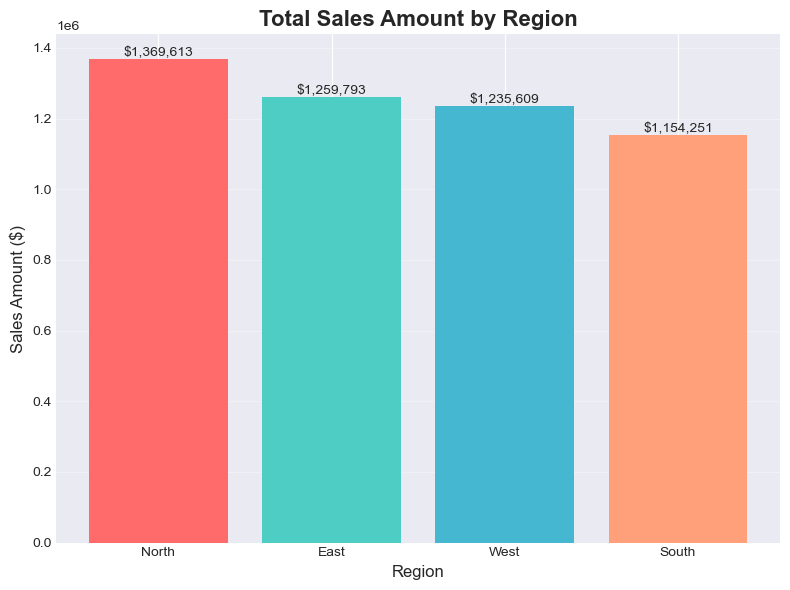

In [14]:
# Figure 1: Sales by Region
fig1, ax1 = plt.subplots(figsize=(8, 6))
region_data = df.groupby('Region')['Sales_Amount'].sum().sort_values(ascending=False)
bars = ax1.bar(region_data.index, region_data.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
ax1.set_title('Total Sales Amount by Region', fontsize=16, fontweight='bold')
ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Sales Amount ($)', fontsize=12)
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.savefig('images/figure1_sales_by_region.png', dpi=300, bbox_inches='tight')
print("Figure 1: Sales by Region saved")


Figure 2: Sales by Product Category saved


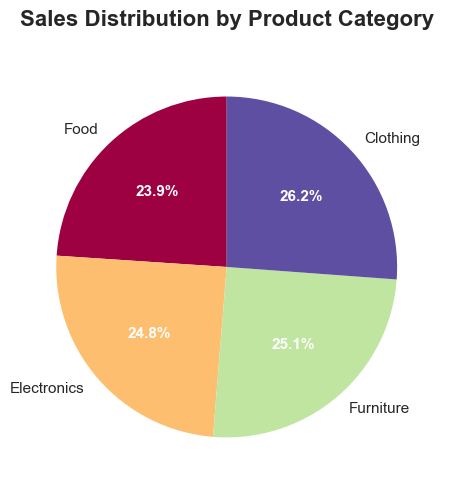

In [15]:
# Figure 2: Sales by Product Category
fig2, ax2 = plt.subplots(figsize=(5, 5))
category_data = df.groupby('Product_Category')['Sales_Amount'].sum().sort_values()
colors = plt.cm.Spectral(np.linspace(0, 1, len(category_data)))
wedges, texts, autotexts = ax2.pie(category_data.values, labels=category_data.index, 
                                     autopct='%1.1f%%', startangle=90, colors=colors,
                                     textprops={'fontsize': 11})
ax2.set_title('Sales Distribution by Product Category', fontsize=16, fontweight='bold', pad=20)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.tight_layout()
plt.savefig('images/figure2_sales_by_category.png', dpi=300, bbox_inches='tight')
print("Figure 2: Sales by Product Category saved")

Figure 3: Monthly Sales Trend saved


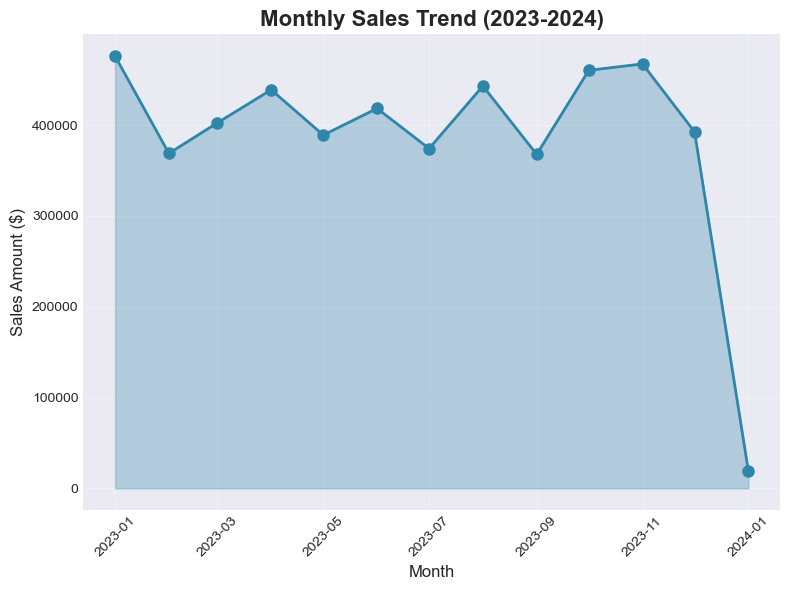

In [16]:
# Figure 3: Monthly Sales Trend
fig3, ax3 = plt.subplots(figsize=(8, 6))
ax3.plot(monthly_sales['Month_Year'], monthly_sales['Sales_Amount'], 
         marker='o', linewidth=2, markersize=8, color='#2E86AB')
ax3.fill_between(monthly_sales['Month_Year'], monthly_sales['Sales_Amount'], 
                 alpha=0.3, color='#2E86AB')
ax3.set_title('Monthly Sales Trend (2023-2024)', fontsize=16, fontweight='bold')
ax3.set_xlabel('Month', fontsize=12)
ax3.set_ylabel('Sales Amount ($)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('images/figure3_monthly_sales_trend.png', dpi=300, bbox_inches='tight')
print("Figure 3: Monthly Sales Trend saved")

Figure 4: Sales Heatmap saved


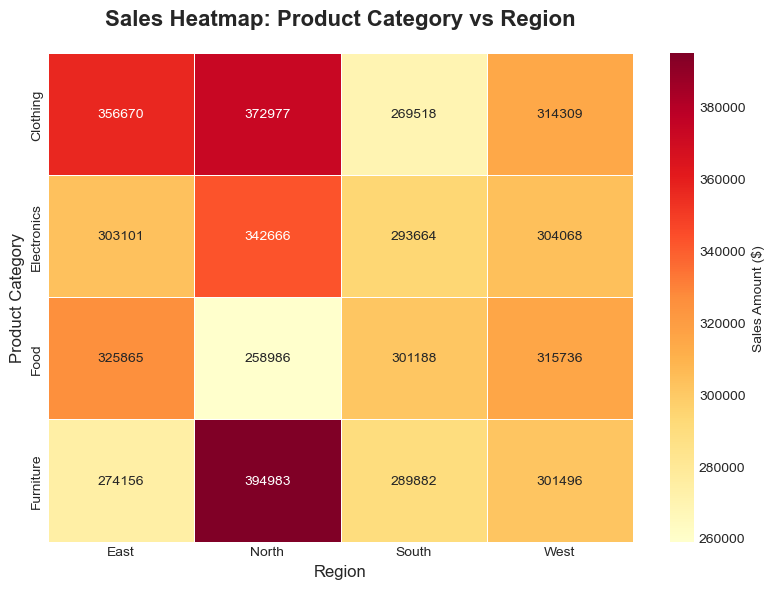

In [17]:
# Figure 4: Sales Performance Heatmap
fig4, ax4 = plt.subplots(figsize=(8, 6))
pivot_data = df.pivot_table(values='Sales_Amount', 
                            index='Product_Category', 
                            columns='Region', 
                            aggfunc='sum')
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', 
           cbar_kws={'label': 'Sales Amount ($)'}, ax=ax4, linewidths=0.5)
ax4.set_title('Sales Heatmap: Product Category vs Region', fontsize=16, fontweight='bold', pad=20)
ax4.set_xlabel('Region', fontsize=12)
ax4.set_ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.savefig('images/figure4_sales_heatmap.png', dpi=300, bbox_inches='tight')
print("Figure 4: Sales Heatmap saved")

### SECTION 5: DIAGNOSTIC ANALYTICS

In [18]:
# 5.1 Why did sales vary across regions?
print("-"*80)
print("Regional Performance Analysis")
print("-"*80)
regional_analysis = df.groupby('Region').agg({
    'Sales_Amount': ['sum', 'mean', 'count'],
    'Discount': 'mean',
    'Profit_Margin': 'mean'
}).round(2)
print(regional_analysis)

--------------------------------------------------------------------------------
Regional Performance Analysis
--------------------------------------------------------------------------------
       Sales_Amount                Discount Profit_Margin
                sum     mean count     mean          mean
Region                                                   
East     1259792.93  4790.09   263     0.16      -3394.74
North    1369612.51  5129.63   267     0.15      -2372.35
South    1154250.86  5107.30   226     0.15      -2808.61
West     1235608.93  5063.97   244     0.15      -3917.31


In [19]:
# 5.2 Which products are most profitable?
print("-"*80)
print("Top 10 Most Profitable Products")
print("-"*80)
product_profit = df.groupby('Product_ID').agg({
    'Sales_Amount': 'sum',
    'Profit': 'sum',
    'Quantity_Sold': 'sum'
}).round(2)
product_profit['Profit_Margin'] = (product_profit['Profit'] / product_profit['Sales_Amount'] * 100).round(2)
top_products = product_profit.nlargest(10, 'Profit')
print(top_products)

--------------------------------------------------------------------------------
Top 10 Most Profitable Products
--------------------------------------------------------------------------------
            Sales_Amount     Profit  Quantity_Sold  Profit_Margin
Product_ID                                                       
1043            19475.57 -154359.67             65        -792.58
1031             9782.28 -196321.98             64       -2006.91
1011            19099.43 -207960.78             75       -1088.83
1065            50350.08 -232256.14            105        -461.28
1018            43906.17 -238172.02            160        -542.46
1041            10682.46 -238952.94            151       -2236.87
1068            28986.54 -240020.16            130        -828.04
1079            17828.37 -264203.64            186       -1481.93
1098            34978.98 -266260.39            126        -761.20
1022            42592.23 -274241.64            127        -643.88


In [20]:
# 5.3 Customer Type Analysis
print("-"*80)
print("Customer Type Analysis")
print("-"*80)
customer_analysis = df.groupby('Customer_Type').agg({
    'Sales_Amount': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Product_ID': 'count'
}).round(2)
print(customer_analysis)

--------------------------------------------------------------------------------
Customer Type Analysis
--------------------------------------------------------------------------------
              Sales_Amount                Profit           Product_ID
                       sum     mean          sum      mean      count
Customer_Type                                                        
New             2506258.30  4972.73 -30591722.95 -60697.86        504
Returning       2513006.93  5066.55 -28231105.46 -56917.55        496


In [21]:
# 5.4 Sales Channel Performance
print("-"*80)
print("Sales Channel Performance")
print("-"*80)
channel_analysis = df.groupby('Sales_Channel').agg({
    'Sales_Amount': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).round(2)
print(channel_analysis)

--------------------------------------------------------------------------------
Sales Channel Performance
--------------------------------------------------------------------------------
               Sales_Amount       Profit  Discount
Sales_Channel                                     
Online           2458833.93 -30001858.19      0.15
Retail           2560431.30 -28820970.22      0.15


In [22]:
# 5.5 Correlation Analysis
print("-"*80)
print("Correlation Analysis")
print("-"*80)
correlation_features = ['Sales_Amount', 'Quantity_Sold', 'Unit_Price', 
                        'Discount', 'Profit', 'Profit_Margin']
correlation_matrix = df[correlation_features].corr()
print(correlation_matrix.round(3))

--------------------------------------------------------------------------------
Correlation Analysis
--------------------------------------------------------------------------------
               Sales_Amount  Quantity_Sold  Unit_Price  Discount  Profit  \
Sales_Amount          1.000         -0.042       0.012     0.023   0.078   
Quantity_Sold        -0.042          1.000       0.057    -0.008  -0.670   
Unit_Price            0.012          0.057       1.000    -0.017  -0.677   
Discount              0.023         -0.008      -0.017     1.000   0.014   
Profit                0.078         -0.670      -0.677     0.014   1.000   
Profit_Margin         0.335         -0.199      -0.218     0.036   0.335   

               Profit_Margin  
Sales_Amount           0.335  
Quantity_Sold         -0.199  
Unit_Price            -0.218  
Discount               0.036  
Profit                 0.335  
Profit_Margin          1.000  



Figure 5: Diagnostic Analytics saved


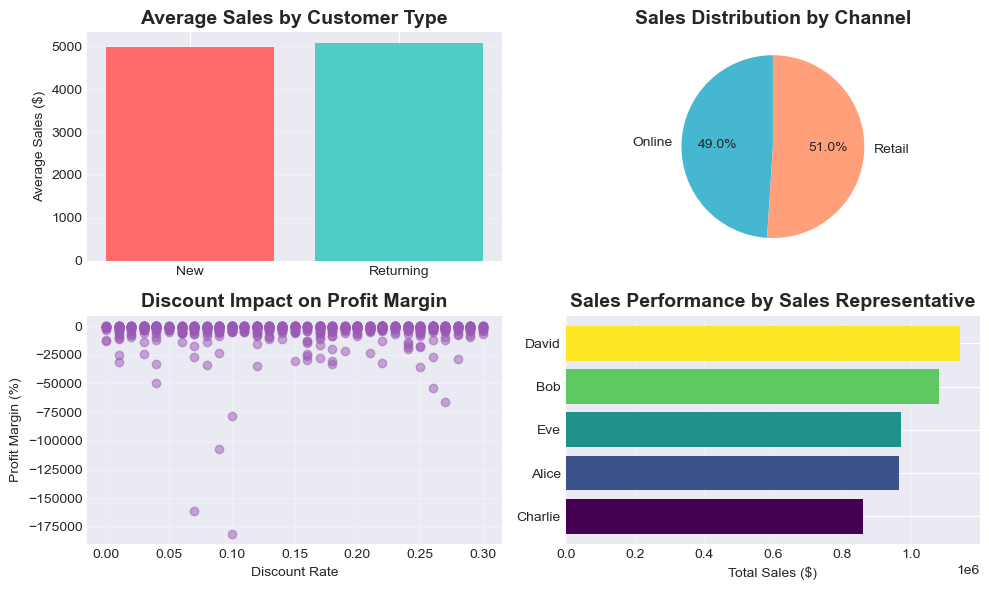

In [23]:
# Visualization for Diagnostic Analytics
fig5, axes = plt.subplots(2, 2, figsize=(10, 6))

# 5a: Average Sales by Customer Type
customer_avg = df.groupby('Customer_Type')['Sales_Amount'].mean()
axes[0, 0].bar(customer_avg.index, customer_avg.values, color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('Average Sales by Customer Type', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Average Sales ($)')
axes[0, 0].grid(axis='y', alpha=0.3)

# 5b: Sales Channel Comparison
channel_data = df.groupby('Sales_Channel')['Sales_Amount'].sum()
axes[0, 1].pie(channel_data.values, labels=channel_data.index, autopct='%1.1f%%', 
              colors=['#45B7D1', '#FFA07A'], startangle=90)
axes[0, 1].set_title('Sales Distribution by Channel', fontsize=14, fontweight='bold')

# 5c: Discount Impact on Profit Margin
axes[1, 0].scatter(df['Discount'], df['Profit_Margin'], alpha=0.5, color='#9B59B6')
axes[1, 0].set_title('Discount Impact on Profit Margin', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Discount Rate')
axes[1, 0].set_ylabel('Profit Margin (%)')
axes[1, 0].grid(True, alpha=0.3)

# 5d: Top Sales Representatives
rep_sales = df.groupby('Sales_Rep')['Sales_Amount'].sum().sort_values(ascending=True)
axes[1, 1].barh(rep_sales.index, rep_sales.values, color=plt.cm.viridis(np.linspace(0, 1, len(rep_sales))))
axes[1, 1].set_title('Sales Performance by Sales Representative', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Total Sales ($)')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('images/figure5_diagnostic_analytics.png', dpi=300, bbox_inches='tight')
print("\nFigure 5: Diagnostic Analytics saved")

### SECTION 6: PREDICTIVE ANALYTICS - MODEL PREPARATION

In [24]:
# Prepare data for predictive modeling
print("-"*80)
print("Preparing Data for Prediction")
print("-"*80)

# Aggregate daily sales for time series forecasting
daily_sales = df.groupby('Sale_Date').agg({
    'Sales_Amount': 'sum',
    'Quantity_Sold': 'sum',
    'Profit': 'sum'
}).reset_index()

# Sort by date
daily_sales = daily_sales.sort_values('Sale_Date')
daily_sales['Days_Since_Start'] = (daily_sales['Sale_Date'] - daily_sales['Sale_Date'].min()).dt.days

# Create lagged features for better prediction
daily_sales['Sales_Lag_7'] = daily_sales['Sales_Amount'].shift(7)
daily_sales['Sales_Lag_14'] = daily_sales['Sales_Amount'].shift(14)
daily_sales['Sales_Lag_30'] = daily_sales['Sales_Amount'].shift(30)
daily_sales['Sales_Rolling_7'] = daily_sales['Sales_Amount'].rolling(window=7).mean()
daily_sales['Sales_Rolling_30'] = daily_sales['Sales_Amount'].rolling(window=30).mean()

# Drop NaN values
daily_sales_clean = daily_sales.dropna()

print(f"Training data shape: {daily_sales_clean.shape}")
print(f"Date range: {daily_sales_clean['Sale_Date'].min()} to {daily_sales_clean['Sale_Date'].max()}")

--------------------------------------------------------------------------------
Preparing Data for Prediction
--------------------------------------------------------------------------------
Training data shape: (310, 10)
Date range: 2023-02-02 00:00:00 to 2024-01-01 00:00:00


### SECTION 7: MODEL BUILDING AND TRAINING

In [25]:
print("-"*80)
print("Building Prediction Models")
print("-"*80)

# Prepare features and target
feature_cols = ['Days_Since_Start', 'Sales_Lag_7', 'Sales_Lag_14', 
               'Sales_Lag_30', 'Sales_Rolling_7', 'Sales_Rolling_30']
X = daily_sales_clean[feature_cols]
y = daily_sales_clean['Sales_Amount']

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      shuffle=False, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Linear Regression
print("-"*80)
print("Training Linear Regression Model")
print("-"*80)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Evaluation
lr_train_r2 = r2_score(y_train, y_pred_lr_train)
lr_test_r2 = r2_score(y_test, y_pred_lr_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
lr_mae = mean_absolute_error(y_test, y_pred_lr_test)

print(f"Linear Regression - Train R²: {lr_train_r2:.4f}")
print(f"Linear Regression - Test R²: {lr_test_r2:.4f}")
print(f"Linear Regression - RMSE: ${lr_rmse:,.2f}")
print(f"Linear Regression - MAE: ${lr_mae:,.2f}")

# Model 2: Random Forest Regressor
print("-"*80)
print("Training Random Forest Model")
print("-"*80)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, 
                                random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)

# Evaluation
rf_train_r2 = r2_score(y_train, y_pred_rf_train)
rf_test_r2 = r2_score(y_test, y_pred_rf_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
rf_mae = mean_absolute_error(y_test, y_pred_rf_test)

print(f"Random Forest - Train R²: {rf_train_r2:.4f}")
print(f"Random Forest - Test R²: {rf_test_r2:.4f}")
print(f"Random Forest - RMSE: ${rf_rmse:,.2f}")
print(f"Random Forest - MAE: ${rf_mae:,.2f}")

--------------------------------------------------------------------------------
Building Prediction Models
--------------------------------------------------------------------------------
Training set size: 248
Test set size: 62
--------------------------------------------------------------------------------
Training Linear Regression Model
--------------------------------------------------------------------------------
Linear Regression - Train R²: 0.1278
Linear Regression - Test R²: 0.1550
Linear Regression - RMSE: $9,290.77
Linear Regression - MAE: $7,784.83
--------------------------------------------------------------------------------
Training Random Forest Model
--------------------------------------------------------------------------------
Random Forest - Train R²: 0.7862
Random Forest - Test R²: -0.1940
Random Forest - RMSE: $11,043.51
Random Forest - MAE: $9,042.39


### SECTION 8: CROSS-VALIDATION

In [26]:
print("-"*80)
print("Performing K-Fold Cross-Validation")
print("-"*80)

# 5-fold cross-validation for Linear Regression
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, 
                               cv=5, scoring='r2')
print(f"\nLinear Regression CV R² Scores: {lr_cv_scores}")
print(f"Mean CV R²: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")

# 5-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, 
                               cv=5, scoring='r2')
print(f"\nRandom Forest CV R² Scores: {rf_cv_scores}")
print(f"Mean CV R²: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

--------------------------------------------------------------------------------
Performing K-Fold Cross-Validation
--------------------------------------------------------------------------------

Linear Regression CV R² Scores: [0.08212306 0.05010896 0.14402137 0.11482408 0.08397477]
Mean CV R²: 0.0950 (+/- 0.0639)

Random Forest CV R² Scores: [ 0.12065972 -0.07600131 -0.04902403 -0.05832065 -0.0106364 ]
Mean CV R²: -0.0147 (+/- 0.1419)


### SECTION 9: FUTURE PREDICTIONS (12 MONTHS FORECAST)

In [27]:
print("-"*80)
print("Generating 12-Month Sales Forecast")
print("-"*80)

# Use the best performing model (Random Forest)
best_model = rf_model

# Prepare for future prediction
last_date = daily_sales_clean['Sale_Date'].max()
last_data = daily_sales_clean.iloc[-1:].copy()

# Generate forecast for next 365 days (12 months)
forecast_days = 365
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_days + 1)]
forecast_results = []

# Simple iterative forecasting
current_features = last_data[feature_cols].values[0]

for i, future_date in enumerate(forecast_dates):
    # Prepare features
    days_since_start = (future_date - daily_sales_clean['Sale_Date'].min()).days
    features = np.array([[days_since_start] + list(current_features[1:])])
    features_scaled = scaler.transform(features)
    
    # Predict
    predicted_sales = best_model.predict(features_scaled)[0]
    
    # Update rolling features
    current_features = np.array([
        days_since_start,
        predicted_sales,  # new lag_7
        current_features[1],  # previous lag_7 becomes lag_14
        current_features[2],  # previous lag_14 becomes lag_30
        predicted_sales,  # new rolling_7
        predicted_sales   # new rolling_30
    ])
    
    forecast_results.append({
        'Date': future_date,
        'Predicted_Sales': predicted_sales
    })

forecast_df = pd.DataFrame(forecast_results)

# Aggregate to monthly forecasts
forecast_df['Year'] = forecast_df['Date'].dt.year
forecast_df['Month'] = forecast_df['Date'].dt.month
monthly_forecast = forecast_df.groupby(['Year', 'Month'])['Predicted_Sales'].sum().reset_index()
monthly_forecast['Month_Year'] = pd.to_datetime(
    monthly_forecast[['Year', 'Month']].assign(DAY=1)
)

print("\n12-Month Sales Forecast:")
print(monthly_forecast)

--------------------------------------------------------------------------------
Generating 12-Month Sales Forecast
--------------------------------------------------------------------------------

12-Month Sales Forecast:
    Year  Month  Predicted_Sales Month_Year
0   2024      1     1.056181e+06 2024-01-01
1   2024      2     1.042632e+06 2024-02-01
2   2024      3     1.114538e+06 2024-03-01
3   2024      4     1.078585e+06 2024-04-01
4   2024      5     1.114538e+06 2024-05-01
5   2024      6     1.078585e+06 2024-06-01
6   2024      7     1.114538e+06 2024-07-01
7   2024      8     1.114538e+06 2024-08-01
8   2024      9     1.078585e+06 2024-09-01
9   2024     10     1.114538e+06 2024-10-01
10  2024     11     1.078585e+06 2024-11-01
11  2024     12     1.114538e+06 2024-12-01


### SECTION 10: VISUALIZATION - PREDICTIVE ANALYTICS

Figure 6: Actual vs Predicted saved


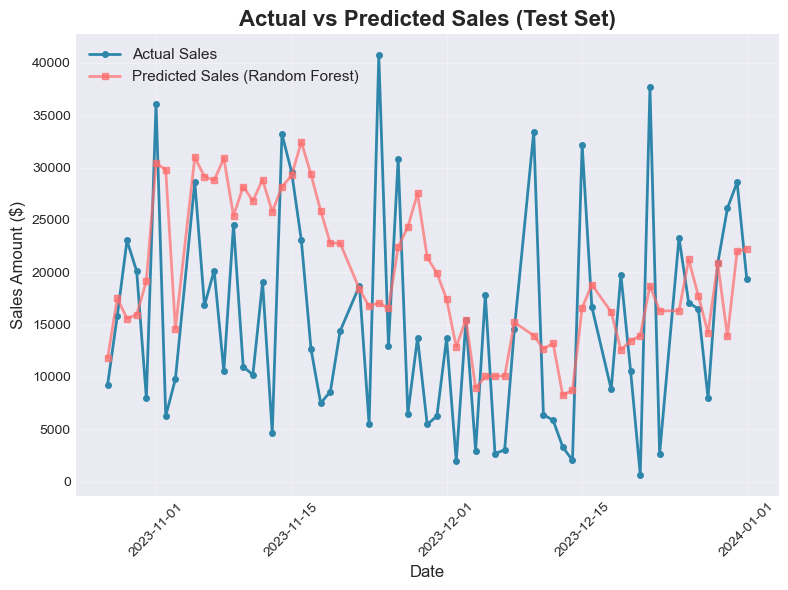

In [28]:
# Figure 6: Actual vs Predicted (Test Set)
fig6, ax6 = plt.subplots(figsize=(8, 6))
test_dates = daily_sales_clean.iloc[-len(y_test):]['Sale_Date']
ax6.plot(test_dates, y_test.values, label='Actual Sales', 
        linewidth=2, marker='o', markersize=4, color='#2E86AB')
ax6.plot(test_dates, y_pred_rf_test, label='Predicted Sales (Random Forest)', 
        linewidth=2, marker='s', markersize=4, color='#FF6B6B', alpha=0.7)
ax6.set_title('Actual vs Predicted Sales (Test Set)', fontsize=16, fontweight='bold')
ax6.set_xlabel('Date', fontsize=12)
ax6.set_ylabel('Sales Amount ($)', fontsize=12)
ax6.legend(fontsize=11)
ax6.grid(True, alpha=0.3)
ax6.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('images/figure6_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
print("Figure 6: Actual vs Predicted saved")

Figure 7: 12-Month Forecast saved


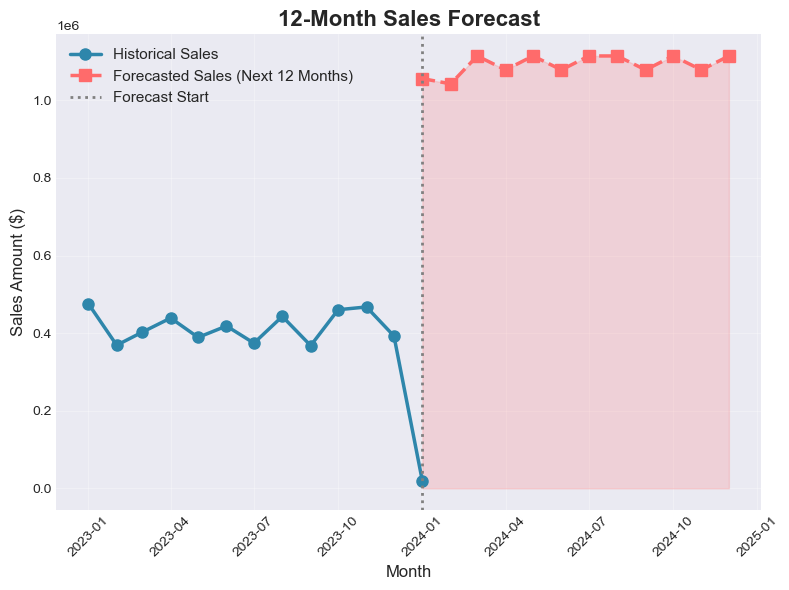

In [29]:
# Figure 7: 12-Month Sales Forecast
fig7, ax7 = plt.subplots(figsize=(8, 6))

# Plot historical data
historical_monthly = df.groupby(['Year', 'Month']).agg({
    'Sales_Amount': 'sum'
}).reset_index()
historical_monthly['Month_Year'] = pd.to_datetime(
    historical_monthly[['Year', 'Month']].assign(DAY=1)
)

ax7.plot(historical_monthly['Month_Year'], historical_monthly['Sales_Amount'], 
        label='Historical Sales', linewidth=2.5, marker='o', markersize=8, color='#2E86AB')
ax7.plot(monthly_forecast['Month_Year'], monthly_forecast['Predicted_Sales'], 
        label='Forecasted Sales (Next 12 Months)', linewidth=2.5, marker='s', 
        markersize=8, color='#FF6B6B', linestyle='--')

# Add shaded region for forecast
ax7.axvline(x=historical_monthly['Month_Year'].max(), color='gray', 
           linestyle=':', linewidth=2, label='Forecast Start')
ax7.fill_between(monthly_forecast['Month_Year'], 0, 
                monthly_forecast['Predicted_Sales'], alpha=0.2, color='#FF6B6B')

ax7.set_title('12-Month Sales Forecast', fontsize=16, fontweight='bold')
ax7.set_xlabel('Month', fontsize=12)
ax7.set_ylabel('Sales Amount ($)', fontsize=12)
ax7.legend(fontsize=11, loc='best')
ax7.grid(True, alpha=0.3)
ax7.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('images/figure7_12month_forecast.png', dpi=300, bbox_inches='tight')
print("Figure 7: 12-Month Forecast saved")

Figure 8: Model Comparison saved


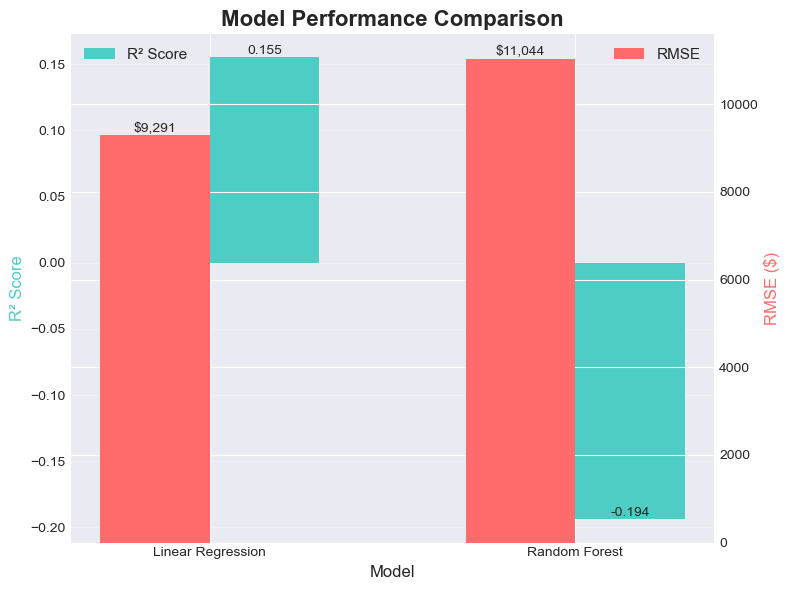

In [30]:
# Figure 8: Model Comparison
fig8, ax8 = plt.subplots(figsize=(8, 6))
models = ['Linear Regression', 'Random Forest']
r2_scores = [lr_test_r2, rf_test_r2]
rmse_scores = [lr_rmse, rf_rmse]

x = np.arange(len(models))
width = -0.3

bars1 = ax8.bar(x - width/2, r2_scores, width, label='R² Score', color='#4ECDC4')
ax8_twin = ax8.twinx()
bars2 = ax8_twin.bar(x + width/2, rmse_scores, width, label='RMSE', color='#FF6B6B')

ax8.set_xlabel('Model', fontsize=12)
ax8.set_ylabel('R² Score', fontsize=12, color='#4ECDC4')
ax8_twin.set_ylabel('RMSE ($)', fontsize=12, color='#FF6B6B')
ax8.set_title('Model Performance Comparison', fontsize=16, fontweight='bold')
ax8.set_xticks(x)
ax8.set_xticklabels(models)
ax8.legend(loc='upper left', fontsize=11)
ax8_twin.legend(loc='upper right', fontsize=11)
ax8.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax8_twin.text(bar.get_x() + bar.get_width()/2., height,
                 f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('images/figure8_model_comparison.png', dpi=300, bbox_inches='tight')
print("Figure 8: Model Comparison saved")

### SECTION 11: FEATURE IMPORTANCE


Feature Importance (Random Forest):
            Feature  Importance
4   Sales_Rolling_7    0.273096
5  Sales_Rolling_30    0.174817
3      Sales_Lag_30    0.154055
1       Sales_Lag_7    0.138207
2      Sales_Lag_14    0.135480
0  Days_Since_Start    0.124345

Figure 9: Feature Importance saved


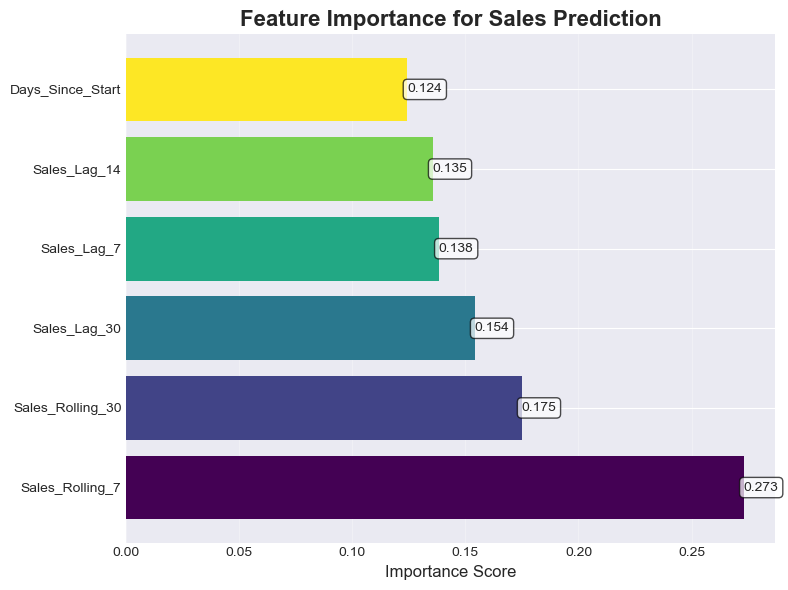

In [31]:
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Visualize feature importance
fig9, ax9 = plt.subplots(figsize=(8, 6))
bars = ax9.barh(feature_importance['Feature'], feature_importance['Importance'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(feature_importance))))
ax9.set_xlabel('Importance Score', fontsize=12)
ax9.set_title('Feature Importance for Sales Prediction', fontsize=16, fontweight='bold')
ax9.grid(axis='x', alpha=0.3)

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax9.text(width, bar.get_y() + bar.get_height()/2., 
            f'{width:.3f}', ha='left', va='center', fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.savefig('images/figure9_feature_importance.png', dpi=300, bbox_inches='tight')
print("\nFigure 9: Feature Importance saved")

### Save processed data and models

In [32]:
df.to_csv('processed_sales_data.csv', index=False)
monthly_forecast.to_csv('12_month_forecast.csv', index=False)

print("\nProcessed data saved to 'processed_sales_data.csv'")
print("Forecast saved to '12_month_forecast.csv'")
print("\nAll figures saved in 'images/' directory")


Processed data saved to 'processed_sales_data.csv'
Forecast saved to '12_month_forecast.csv'

All figures saved in 'images/' directory
